<a href="https://colab.research.google.com/github/Sakshi610/NNDL_Lab-CST3/blob/main/Exp1_c_bankchurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXPERIMENT 1(c)**

**AIM** : Implementation of ANN - Customer churn prediction using dataset for Bank.

Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

1) Build a deep learning model to predict churn rate at bank.

2) Once model is built, print classification report and analyze precision, recall and f1-score

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
import seaborn as sn
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.compose import ColumnTransformer

In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
features = df.drop(labels=['CustomerId', 'Surname', 'RowNumber', 'Exited'], axis = 1)
target  = df        ['Exited']

In [ ]:
features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
features = pd.get_dummies(features, prefix=['geo'],columns=['Geography'])
features.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geo_France,geo_Germany,geo_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,1


In [ ]:
label1 = LabelEncoder()
features['Gender'] = label1.fit_transform(features['Gender'])

In [ ]:
features.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geo_France,geo_Germany,geo_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [ ]:
train,test,trainlabel,testlabel = train_test_split(features, target, test_size = 0.2, random_state = 1)

In [ ]:
print("Training samples:" , train.shape[0])
print("Testing samples:" ,test.shape[0])
print("Training sample size:",train.shape)
print("Testing sample size:",test.shape)

Training samples: 8000
Testing samples: 2000
Training sample size: (8000, 12)
Testing sample size: (2000, 12)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
train = sc.fit_transform(train)# Scaling fitted only to training set to avoid information leakage.
test = sc.transform(test)




In [ ]:
from keras.models import load_model 
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
#Create a variable to represent the ANN model as an instance
model = Sequential([
        keras.layers.Dense(units=32,activation="relu",kernel_initializer="normal",input_dim = 12), #input layer and hidden layer
        keras.layers.Dense(units=16,activation="relu",kernel_initializer="normal"), #hidden layer
        keras.layers.Dense(units=1,activation="sigmoid",kernel_initializer="normal") #output layer
      ])

In [ ]:
#Create a variable to represent the ANN model as an instance
model = Sequential([
        keras.layers.Dense(units=32,activation="relu",kernel_initializer="normal",input_dim = 12), #input layer and hidden layer
        keras.layers.Dense(units=16,activation="relu",kernel_initializer="normal"), #hidden layer
        keras.layers.Dense(units=1,activation="sigmoid",kernel_initializer="normal") #output layer
      ])

In [ ]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train,trainlabel,batch_size=20,epochs = 100) #model run for 100 epochs

Epoch 1/100
400/400 [==============================] - 3s 4ms/step - loss: 0.4740 - accuracy: 0.7972
Epoch 2/100
400/400 [==============================] - 2s 4ms/step - loss: 0.4241 - accuracy: 0.8024
Epoch 3/100
400/400 [==============================] - 2s 4ms/step - loss: 0.4162 - accuracy: 0.8284
Epoch 4/100
400/400 [==============================] - 1s 2ms/step - loss: 0.4107 - accuracy: 0.8339
Epoch 5/100
400/400 [==============================] - 1s 2ms/step - loss: 0.4064 - accuracy: 0.8346
Epoch 6/100
400/400 [==============================] - 1s 2ms/step - loss: 0.4032 - accuracy: 0.8356
Epoch 7/100
400/400 [==============================] - 1s 2ms/step - loss: 0.4013 - accuracy: 0.8350
Epoch 8/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3992 - accuracy: 0.8371
Epoch 9/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3980 - accuracy: 0.8360
Epoch 10/100
400/400 [==============================] - 1s 3ms/step - loss: 0.3959 - accura

In [ ]:
model.fit(train,trainlabel,batch_size=20,epochs = 100) #model run for 100 epochs

Epoch 1/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3188 - accuracy: 0.8686
Epoch 2/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3175 - accuracy: 0.8668
Epoch 3/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3185 - accuracy: 0.8686
Epoch 4/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3179 - accuracy: 0.8673
Epoch 5/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3182 - accuracy: 0.8673
Epoch 6/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3178 - accuracy: 0.8683
Epoch 7/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3177 - accuracy: 0.8698
Epoch 8/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3173 - accuracy: 0.8711
Epoch 9/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3165 - accuracy: 0.8676
Epoch 10/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3175 - accura

In [ ]:
model.save("/content/drive/MyDrive/churn/model_pd_85.h5")

In [ ]:
from keras.models import load_model 
model = load_model("/content/drive/MyDrive/churn/model_pd_85.h5") 
trainloss , trainaccuracy = model.evaluate(train,trainlabel)
testloss, testaccuracy = model.evaluate(test,testlabel) 
print('Train loss:', trainloss)
print('Train accuracy:', 100*trainaccuracy)
print('Test loss:', testloss)
print('Test accuracy:', 100*testaccuracy)

63/63 [==============================] - 0s 2ms/step - loss: 0.3470 - accuracy: 0.8610
Train loss: 0.30160093307495117
Train accuracy: 87.67499923706055
Test loss: 0.3469932973384857
Test accuracy: 86.10000014305115


Text(69.0, 0.5, 'Expected')

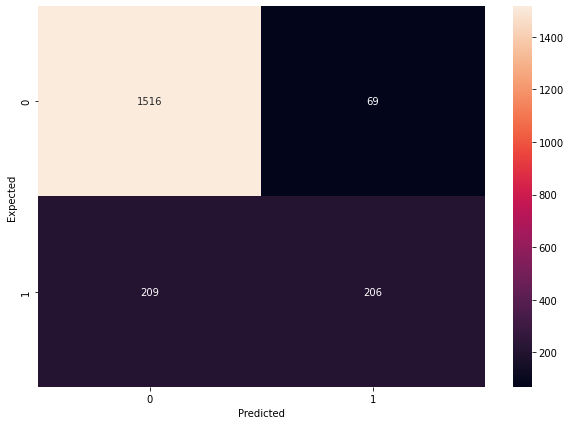

In [ ]:
y_predicted = model.predict(test)
y_predicted_labels = y_predicted > 0.5
cm = tf.math.confusion_matrix(labels=testlabel,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Expected')

In [ ]:
#PRECISION
precision_0 = round(1548 / (1548+244),2)
precision_1 = round(171 / (171+37),2)


print("Precision for customers who did not leave the bank:",precision_0)
print("Precision for customers who left the bank:",precision_1)

Precision for customers who did not leave the bank: 0.86
Precision for customers who left the bank: 0.82


In [ ]:
#RECALL
recall_0 = round(1548 / (1548+37),2)
recall_1 = round(171 / (171+244),2)
print("Recall for customers who did not leave the bank:",recall_0)
print("Recall for customers who left the bank:",recall_1)

Recall for customers who did not leave the bank: 0.98
Recall for customers who left the bank: 0.41


In [ ]:
#F1 SCORE
f1_score_0 = round(2 * ((precision_0 * recall_0) / (precision_0 + recall_0)),2)
f1_score_1 = round(2 * ((precision_1 * recall_1) / (precision_1 + recall_1)),2)

print("F1 score for customers who did not leave the bank:",f1_score_0)
print("F1 score for customers who left the bank:",f1_score_1)

F1 score for customers who did not leave the bank: 0.92
F1 score for customers who left the bank: 0.55


In [ ]:
#F1 SCORE
f1_score_0 = round(2 * ((precision_0 * recall_0) / (precision_0 + recall_0)),2)
f1_score_1 = round(2 * ((precision_1 * recall_1) / (precision_1 + recall_1)),2)

print("F1 score for customers who did not leave the bank:",f1_score_0)
print("F1 score for customers who left the bank:",f1_score_1)

F1 score for customers who did not leave the bank: 0.92
F1 score for customers who left the bank: 0.55


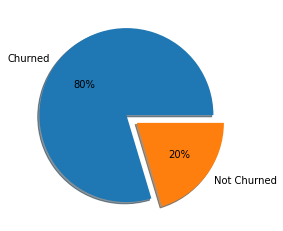

In [ ]:
import matplotlib.pyplot as plt

output = df['Exited'].value_counts() #counting the number of entries for values of Exited i.e 0,1
out_labels = ['Churned','Not Churned']
out_explode = [0,0.15]

plt.pie(output, labels=out_labels, explode=out_explode, autopct='%1.0f%%',shadow=True)
plt.show()

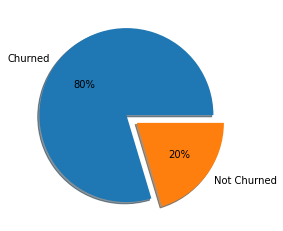

In [ ]:
import matplotlib.pyplot as plt

output = df['Exited'].value_counts() #counting the number of entries for values of Exited i.e 0,1
out_labels = ['Churned','Not Churned']
out_explode = [0,0.15]

plt.pie(output, labels=out_labels, explode=out_explode, autopct='%1.0f%%',shadow=True)
plt.show()

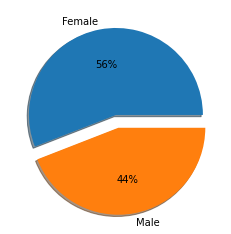

Female    1139
Male       898
Name: Gender, dtype: int64

In [ ]:
df_cond = df['Exited'].values==1
df_churned = df[df_cond]          #dataset containing only churned entries
gen_count = df_churned['Gender'].value_counts()   #counting the number of entries for each gender in churned dataset
gen_labels = ['Female','Male']
gen_explode = [0,0.15]

plt.pie(gen_count, labels=gen_labels, explode=gen_explode, autopct='%1.0f%%',shadow=True)
plt.show()
gen_count

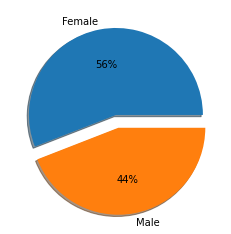

Female    1139
Male       898
Name: Gender, dtype: int64

In [ ]:
df_cond = df['Exited'].values==1
df_churned = df[df_cond]          #dataset containing only churned entries
gen_count = df_churned['Gender'].value_counts()   #counting the number of entries for each gender in churned dataset
gen_labels = ['Female','Male']
gen_explode = [0,0.15]

plt.pie(gen_count, labels=gen_labels, explode=gen_explode, autopct='%1.0f%%',shadow=True)
plt.show()
gen_count

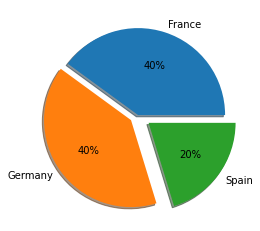

Germany    814
France     810
Spain      413
Name: Geography, dtype: int64

In [ ]:
geo_count = df_churned['Geography'].value_counts() #counting the number of entries for each country in chuned dataset
geo_labels = ['France','Germany','Spain']
geo_explode = [0,0.1,0.15]

plt.pie(geo_count,labels = geo_labels,explode = geo_explode, autopct = '%1.0f%%',shadow = True)
plt.show()
geo_count

In [ ]:
df_cond = df['Exited'].values==0
df_notchurned = df[df_cond]
df_cond = df['Exited'].values==0
df_notchurned = df[df_cond]

In [ ]:
df_churned['NumOfProducts'].value_counts()  #count for each value of NumOfProducts of churned customer

1    1409
2     348
3     220
4      60
Name: NumOfProducts, dtype: int64

In [ ]:
df_churned['NumOfProducts'].value_counts()  #count for each value of NumOfProducts of churned customer

1    1409
2     348
3     220
4      60
Name: NumOfProducts, dtype: int64